In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('eo1.csv')
df2=pd.read_csv('eo2.csv')
df3=pd.read_csv('eo3.csv')
dfz=pd.read_csv('zipmsa.csv')

In [80]:
df4=df1.append(df2, ignore_index=True).append(df3, ignore_index=True)
df4['ZIP']=pd.DataFrame(list(df4['ZIP'].str.split('-')))
dfz['ZIP CODE']=pd.Series(dfz['ZIP CODE']).astype(str).str.zfill(5)
df=df4.merge(dfz, how='left', left_on=['ZIP','STATE'],right_on=['ZIP CODE','STATE'])
df.to_csv('eo.csv')

1571022

Merge

1)IRS Data

In [9]:
df1['INCOME_AMT']=df1['INCOME_AMT'].replace('$','').replace(',','').astype(float)

In [10]:
df1['ASSET_AMT']=df1['ASSET_AMT'].replace('$','').replace(',','').astype(float)

In [11]:
df1['REVENUE_AMT']=df1['REVENUE_AMT'].replace('$','').replace(',','').astype(float)

In [81]:
df1.to_csv('eo.csv')

In [4]:
df1=pd.read_csv('eo.csv')

In [6]:
df1['NTEE(26)']=df1['NTEE_CD'].apply(lambda x: str(x)[0])

In [36]:
df1.drop(df1.columns[0],axis=1,inplace=True)

In [7]:
cities=['New York','Washington','Chicago','San Francisco','Boston','Seattle','Houston','Minneapolis','Philadelphia','Dallas','San Jose']

In [8]:
df1['Key']= df1['MSA1'].apply(lambda x : 1 if x in cities else 0)

In [20]:
df1['EIN']=pd.Series(df1['EIN']).astype(str).str.zfill(9)

2)Rank Data

In [9]:
df2=pd.read_csv('ngoall.csv')

In [227]:
df2['EIN']=pd.DataFrame(list(df2['EIN'].str.replace('-','')))

In [228]:
len(df2)

8197

In [229]:
len(df2.loc[df2['EIN'].isin(list(df1['EIN']))])

8183

In [230]:
df2=df2[['EIN','Overall']]

In [231]:
df12=df1.merge(df2, how='left', left_on=['EIN'],right_on=['EIN'])

In [232]:
df12['NTEE(26)'].unique()

array(['n', 'X', 'N', 'Z', 'A', 'S', 'P', 'E', 'Y', 'W', 'B', 'O', 'U',
       'T', 'F', 'H', 'L', 'D', 'C', 'G', 'Q', 'I', 'J', 'M', 'K', 'R',
       'V', '0', 'c', '8'], dtype=object)

In [233]:
df12['NTEE(26)']=df12['NTEE(26)'].str.replace('c', 'C').str.replace('n', '').str.replace('8', '').str.replace('0', '')

In [218]:
df3

,NTEE_Type(10),NTEE(26),NTEE_Type(26)
0,"Arts, Culture, and Humanities",A,"Arts, Culture, and Humanities"
1,Education,B,Educational Institutions
2,Environment and Animals,C,"Environmental Quality Protection, Beautification"
3,Environment and Animals,D,Animal related
4,Health,E,Health-General & Rehabilitative
5,Health,F,"Mental Health, Crisis Intervention"
6,Health,G,"Disease, Disorders, Medical Disciplines"
7,Health,H,Medical Research
8,Human Services,I,"Crime, Legal Related"
9,Human Services,J,"Employment, Job Related"


In [234]:
df123=df12.merge(df3, how='left', left_on=['NTEE(26)'],right_on=['NTEE(26)'])

In [235]:
df123.to_csv('IRSCN.csv',encoding='utf-8',index=False)

In [2]:
df=pd.read_csv('IRSCN.csv')

In [4]:
df['INCOME_CD'].describe()

count    1571022.00000
mean           1.60203
std            2.23451
min            0.00000
25%            0.00000
50%            0.00000
75%            3.00000
max            9.00000
Name: INCOME_CD, dtype: float64

In [24]:
df['SUBSECTION'].unique()

array([ 3,  7,  5, 19, 10,  6,  8,  4, 13, 12, 14,  2,  1, 92, 15,  9, 91,
       50, 17, 25, 26, 11, 40,  0, 27, 20, 82, 18, 16, 29, 23, 71, 81], dtype=int64)

In [17]:
df2=df[df['INCOME_CD']>0]

In [18]:
df2['INCOME_CD'].describe()

count    629381.000000
mean          3.998889
std           1.696623
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           9.000000
Name: INCOME_CD, dtype: float64

In [19]:
df2.to_csv('IRS_Nonzero.csv',encoding='utf-8',index=False)

Top NGOs

In [237]:
df['EIN']=pd.Series(df['EIN']).astype(str).str.zfill(9)

In [238]:
df['ZIP']=pd.Series(df['ZIP']).astype(str).str.zfill(5)

In [239]:
df[['NTEE_CD','NTEE(26)','NTEE_Type(26)']]

,NTEE_CD,NTEE(26),NTEE_Type(26)
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,X21,X,"Religion, Spiritual Development"
3,X21,X,"Religion, Spiritual Development"
4,X20,X,"Religion, Spiritual Development"
5,X20,X,"Religion, Spiritual Development"
6,X20,X,"Religion, Spiritual Development"
7,NaN,NaN,NaN
8,N60,N,"Recreation, Sports, Leisure, Athletics"
9,Z99,Z,"Unknown, Unclassified"


In [240]:
df['NTEE(26)'].unique()

array([nan, 'X', 'N', 'Z', 'A', 'S', 'P', 'E', 'Y', 'W', 'B', 'O', 'U',
       'T', 'F', 'H', 'L', 'D', 'C', 'G', 'Q', 'I', 'J', 'M', 'K', 'R', 'V'], dtype=object)

In [255]:
df['PF_FILING_REQ_CD'].unique()

array([0, 1, 3, 2, 8], dtype=int64)

In [257]:
df[df['PF_FILING_REQ_CD']==1].to_csv('990PF.csv',index=False)

In [246]:
df['NTEE_Type(10)'].unique()

array([nan, 'Religion Related', 'Human Services', 'Unknown, Unclassified',
       'Arts, Culture, and Humanities', 'Public, Societal Benefit',
       'Health', 'Mutual/Membership Benefit', 'Education',
       'Environment and Animals', 'International, Foreign Affairs'], dtype=object)

In [247]:
dff=df[(df['Key']==1) & (df['NTEE(26)'] != 'B') & ((df['INCOME_AMT']>=1000000000) | (df['Overall']>95))]

In [259]:
dff2=d[(d['Key']==1) & (d['NTEE(26)'] != 'B') & ((d['INCOME_AMT']>=1000000000) | (d['Overall']>95))]

In [260]:
dff2

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,SORT_NAME,ZIP CODE,MSA1,MSA2,MSA3,NTEE(26),Key,Overall,NTEE_Type(10),NTEE_Type(26)
24661,043293081,GERALD R JORDAN JR FOUNDATION,% HELLMAN JORDAN MANAGEMENT CO INC,125 HIGH ST STE 801,BOSTON,MA,02110,0,3,3,...,GORDAN GERALD TTEE,2110,Boston,Cambridge,Quincy,A,1,NaN,"Arts, Culture, and Humanities","Arts, Culture, and Humanities"
63642,131684331,FORD FOUNDATION,% CHIEF OPERATING OFFICER,320 E 43RD ST,NEW YORK,NY,10017,0,3,3,...,NaN,10017,New York,Northern New Jersey,Long Island,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
81816,137184401,THE LEONA M & HARRY B HELMSLEY CHARITABLE TRUST,NaN,230 PARK AVE RM 659,NEW YORK,NY,10169,0,3,3,...,NaN,10169,New York,Northern New Jersey,Long Island,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
160470,263753801,FOUNDATION TO PROMOTE OPEN SOCIETY,% RICARDO CASTRO,224 W 57TH ST,NEW YORK,NY,10019,0,3,3,...,NaN,10019,New York,Northern New Jersey,Long Island,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
230791,900747216,THE JPB FOUNDATION,NaN,9 W 57TH ST STE 3800,NEW YORK,NY,10019,0,3,3,...,NaN,10019,New York,Northern New Jersey,Long Island,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
263791,203734688,SHELBY CULLOM DAVIS CHARITABLE FUND INC,% CARTER LEDYARD & MILBURN LLP,501 SILVERSIDE RD,WILMINGTON,DE,19809,0,3,3,...,NaN,19809,Philadelphia,Camden,Wilmington,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
270331,205434405,MARGARET A CARGILL FOUNDATION,% CHRISTINE MORSE,6889 ROWLAND RD,EDEN PRAIRIE,MN,55344,0,3,3,...,NaN,55344,Minneapolis,St. Paul,Bloomington,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
306795,237093598,JOHN D & CATHERINE T MACARTHUR FOUNDATION,NaN,140 S DEARBORN ST STE 1200,CHICAGO,IL,60603,0,3,3,...,NaN,60603,Chicago,Naperville,Joliet,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
793102,621322826,JOHN TEMPLETON FOUNDATION,% STEVE LEPKOWSKI,300 CONSHOHOCKEN STATE RD,WEST CONSHOHOCKEN,PA,19428,0,3,3,...,NaN,19428,Philadelphia,Camden,Wilmington,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"
1201613,562618866,BILL & MELINDA GATES FOUNDATION,% WILLIAM H GATES III TTEE,PO BOX 23350,SEATTLE,WA,98102,0,3,3,...,NaN,98102,Seattle,Tacoma,Bellevue,T,1,NaN,"Public, Societal Benefit","Philanthropy, Voluntarism, and Grantmaking"


In [155]:
list(dff.columns.values)

['EIN',
 'NAME',
 'ICO',
 'STREET',
 'CITY',
 'STATE',
 'ZIP',
 'GROUP',
 'SUBSECTION',
 'AFFILIATION',
 'CLASSIFICATION',
 'RULING',
 'DEDUCTIBILITY',
 'FOUNDATION',
 'ACTIVITY',
 'ORGANIZATION',
 'STATUS',
 'TAX_PERIOD',
 'ASSET_CD',
 'INCOME_CD',
 'FILING_REQ_CD',
 'PF_FILING_REQ_CD',
 'ACCT_PD',
 'ASSET_AMT',
 'INCOME_AMT',
 'REVENUE_AMT',
 'NTEE_CD',
 'SORT_NAME',
 'ZIP CODE',
 'MSA1',
 'MSA2',
 'MSA3',
 'NTEE(26)',
 'Key',
 'Overall',
 'Financial',
 'Transparency',
 'Tel',
 'Website',
 'Missions',
 'NTEE_Type(10)',
 'NTEE_Type(26)']

In [212]:
dff[['NAME','EIN','ZIP','MSA1','NTEE_CD','NTEE_Type(26)','NTEE_Type(10)','ASSET_AMT','INCOME_AMT','RULING','Overall']].to_excel('TopNGOs1.xlsx',index=False)

Visualization

In [170]:
%matplotlib inline

In [172]:
dfv=df[(df['NTEE(26)'] != '0')&(df['NTEE(26)'] != 'Z')&(df['Key']==1)]

In [204]:
dfv=df[df['Key']==1]

In [209]:
dfv.count()

EIN                 366168
NAME                366168
ICO                 250018
STREET              366168
CITY                366168
STATE               366168
ZIP                 366168
GROUP               366168
SUBSECTION          366168
AFFILIATION         366168
CLASSIFICATION      366168
RULING              366168
DEDUCTIBILITY       366168
FOUNDATION          366168
ACTIVITY            366168
ORGANIZATION        366168
STATUS              366168
TAX_PERIOD          291932
ASSET_CD            366168
INCOME_CD           366168
FILING_REQ_CD       366168
PF_FILING_REQ_CD    366168
ACCT_PD             366168
ASSET_AMT           288408
INCOME_AMT          288408
REVENUE_AMT         253184
NTEE_CD             234809
SORT_NAME            83885
ZIP CODE            366168
MSA1                366168
MSA2                366168
MSA3                366168
NTEE(26)            366168
Key                 366168
Overall               3319
Financial             3319
Transparency          3319
T

In [205]:
dfv['NTEE_Type(10)'].fillna('Unknown, Unclassified',inplace=True)

C:\Users\yuxiao\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


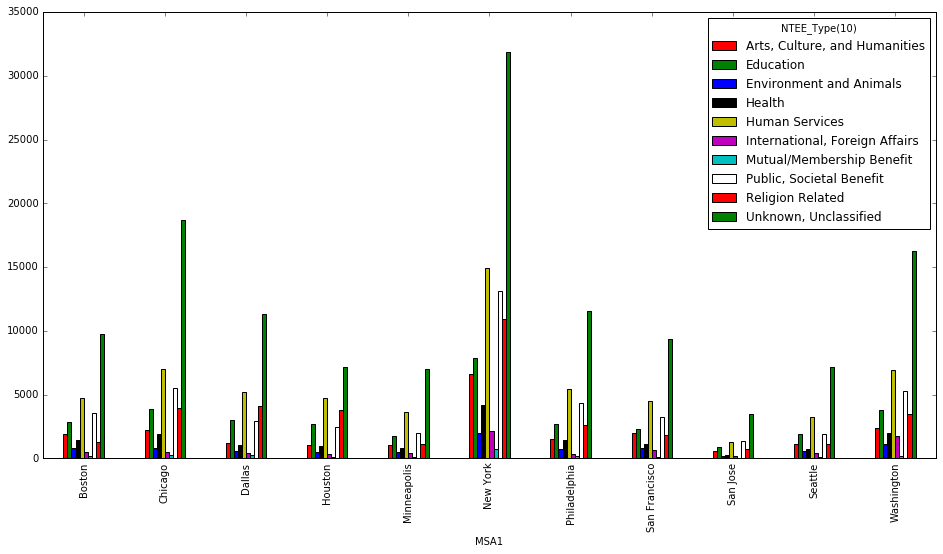

In [208]:
colors = 'rgbkymcw'
ngo_by_key= dfv.groupby(['NTEE_Type(10)','MSA1'])
ngo_by_key_count = ngo_by_key['EIN'].count().unstack('NTEE_Type(10)')
ngo_by_key_count.plot.bar(figsize=(16,8),color=colors)

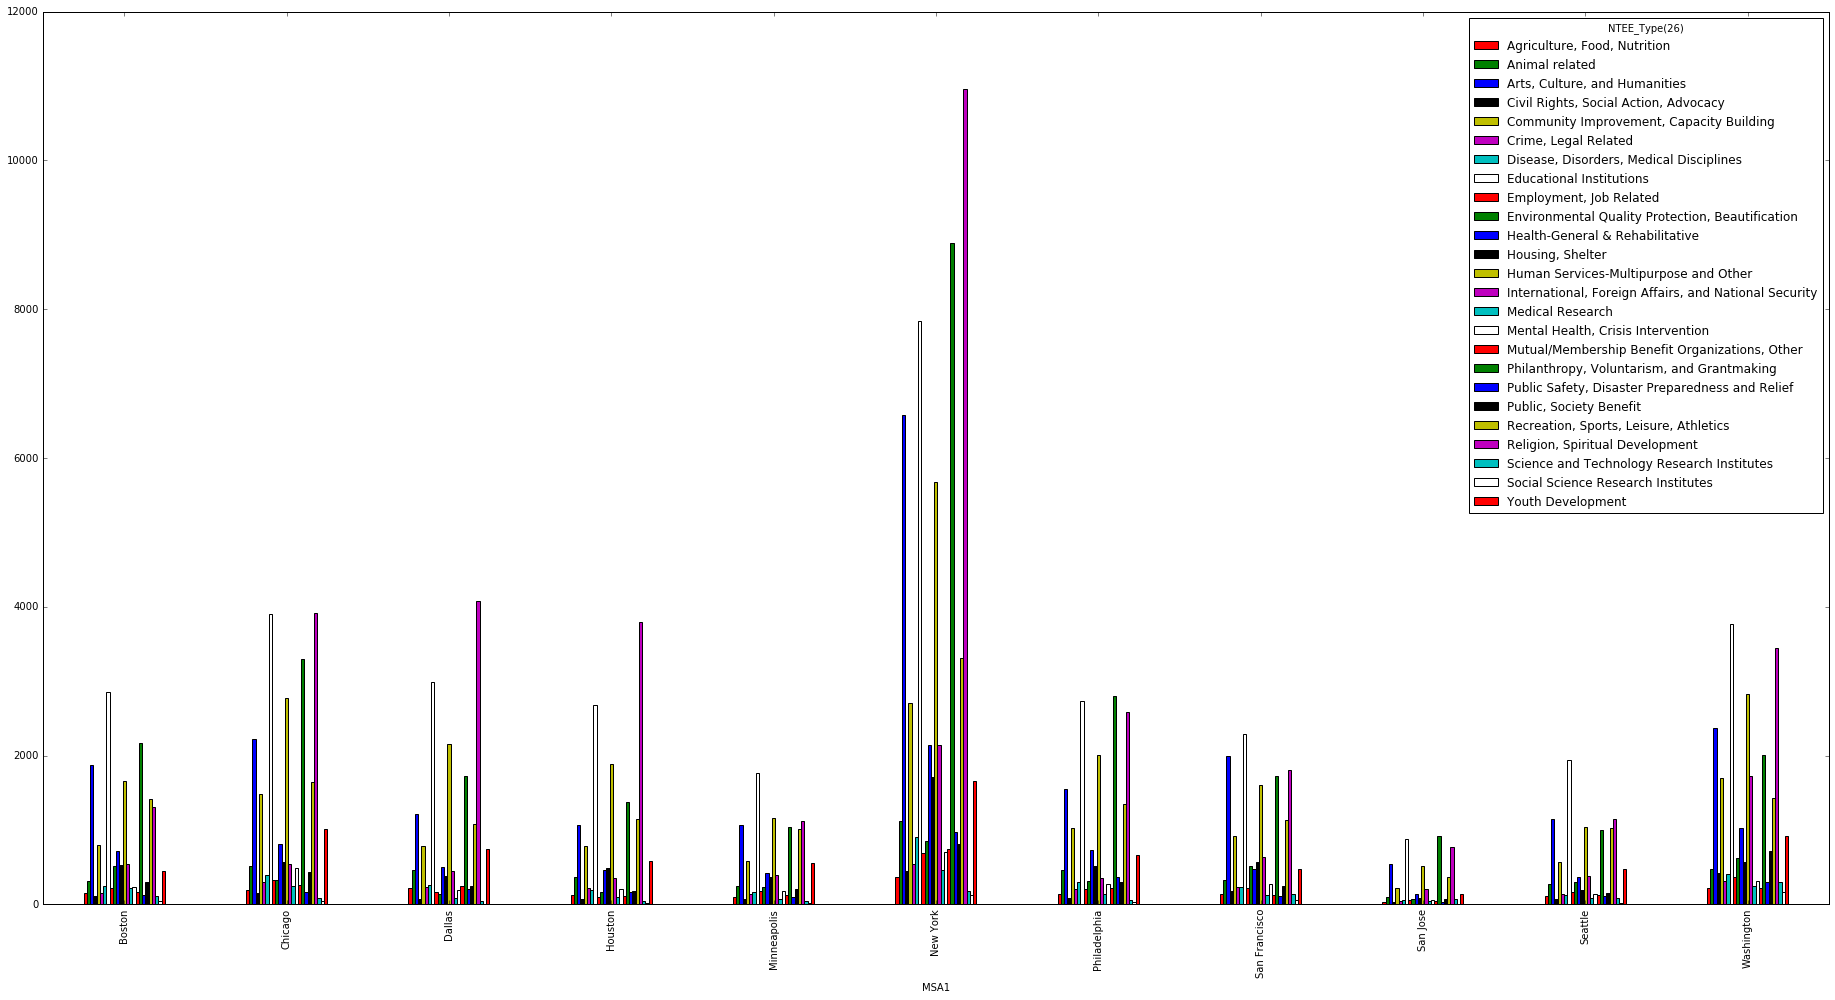

In [184]:
ngo_by_key= dfv.groupby(['NTEE_Type(26)','MSA1'])
ngo_by_key_count = ngo_by_key['EIN'].count().unstack('NTEE_Type(26)')
ngo_by_key_count.plot.bar(figsize=(32,16),color=colors)

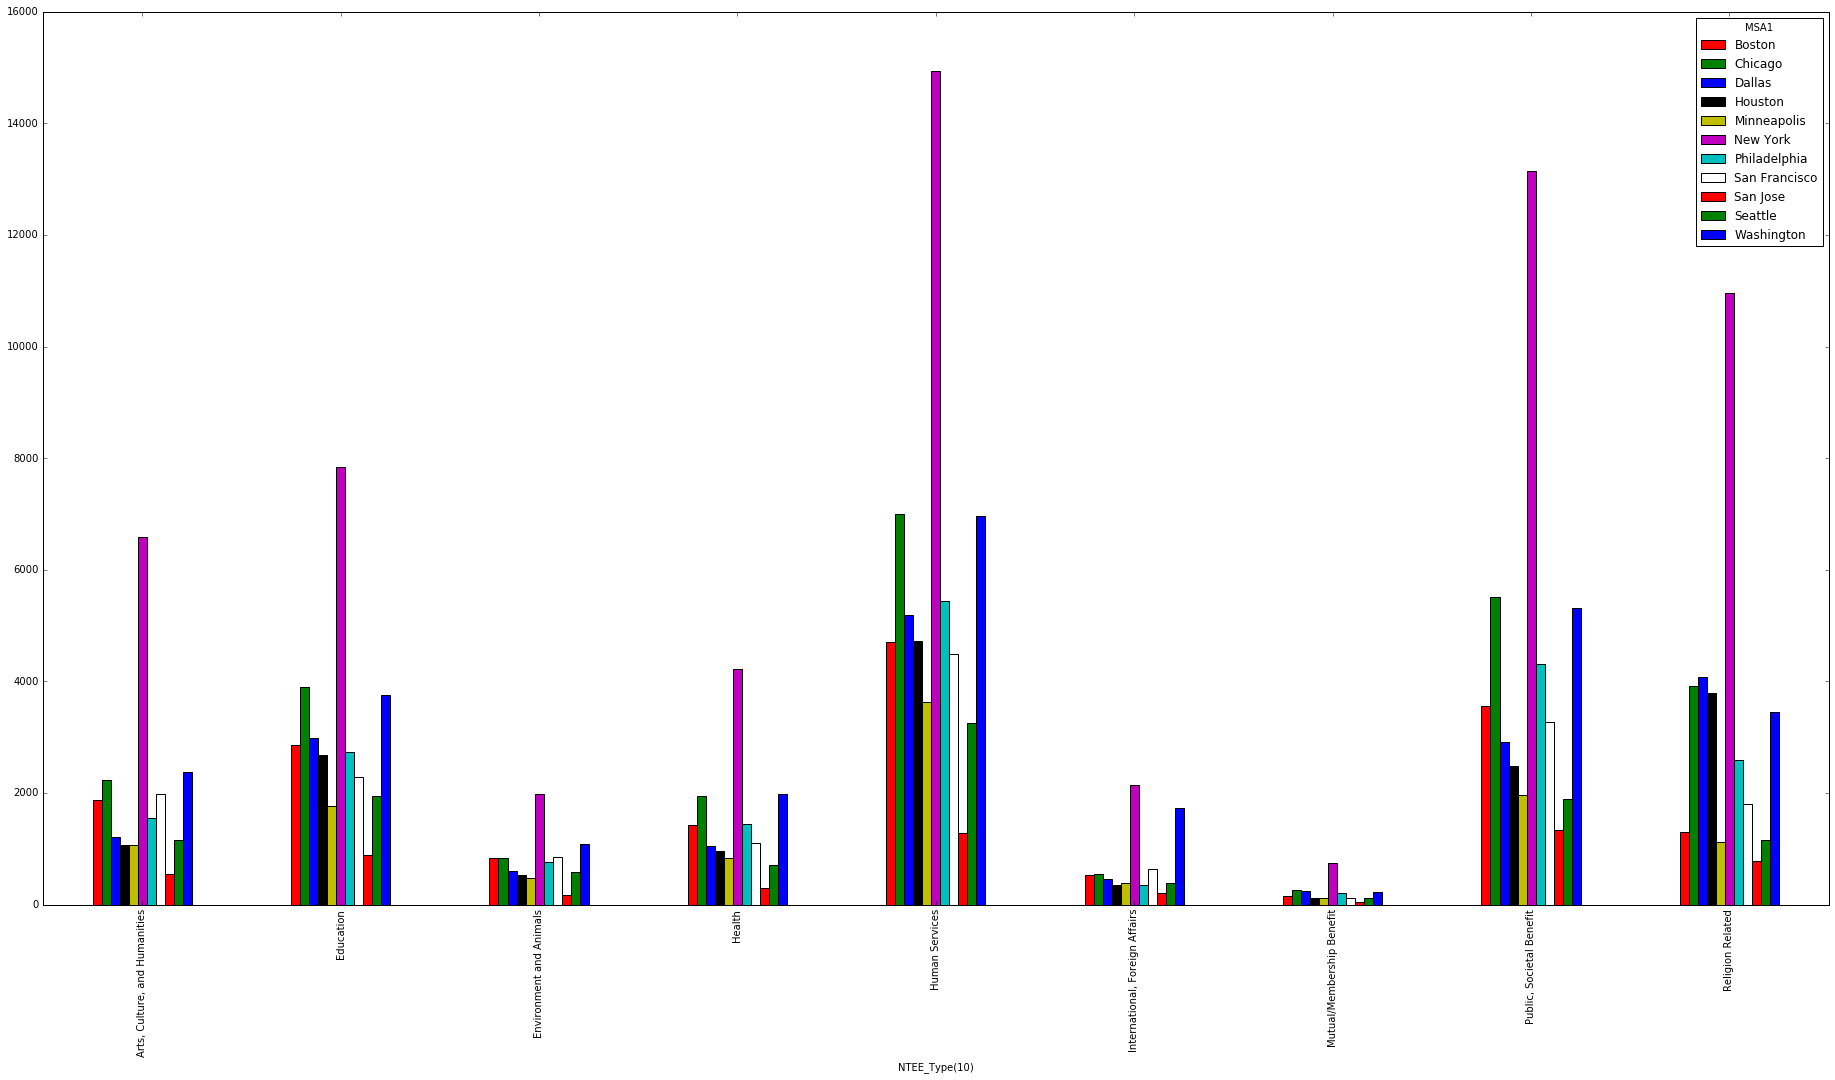

In [182]:
ngo_by_key= dfv.groupby(['NTEE_Type(10)','MSA1'])
ngo_by_key_count = ngo_by_key['EIN'].count().unstack('MSA1')
ngo_by_key_count.plot.bar(figsize=(32,16),color=colors)